Importing all the required libaries

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
df.shape #getting dimensions

(891, 12)

In [226]:
df.info() #full information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [227]:
df.columns  # finding columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [228]:
df.describe()  # statistical description

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [229]:
df.isna().sum() # finding null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

as Cabin column has more no. of missing values which give biasness in a model. so we will remove Cabin column

removing passengerId, Name and ticket columns as it also give no info to predict the data

In [230]:
# dropping he columns which not give any help in predicting the dataset
df=df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1) 

In [231]:
#Filling the missing values with help of median and mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [232]:
df.isna().sum() # finding null after dropping and filling the columns

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [233]:
df['Survived'].value_counts() # No. of count for survived 

0    549
1    342
Name: Survived, dtype: int64

In [234]:
 df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [235]:
 df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [236]:
 df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [237]:
 df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [238]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## Encoding the Data

In [239]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])
df['Embarked']=LE.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

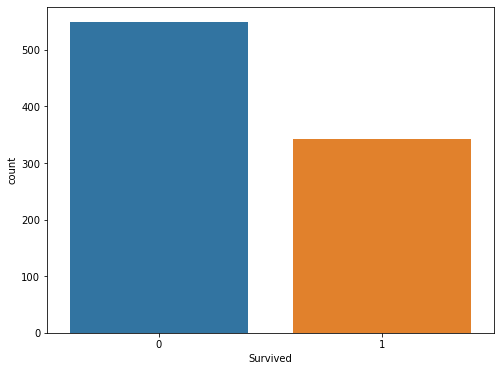

In [240]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

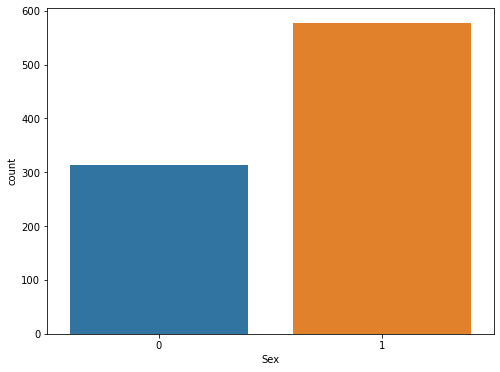

In [241]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

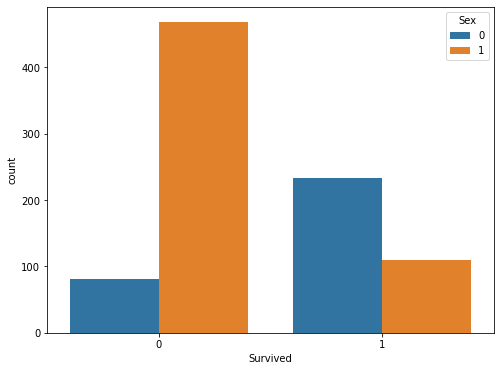

In [242]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

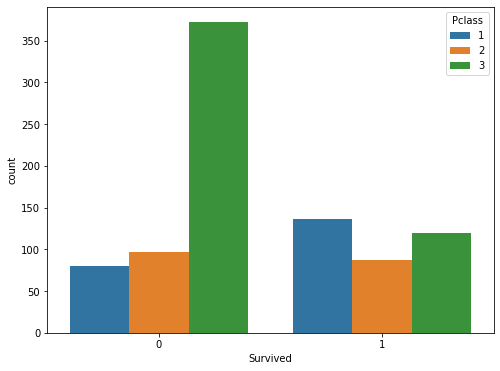

In [243]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Pclass', data=df)

#### Pair Plot

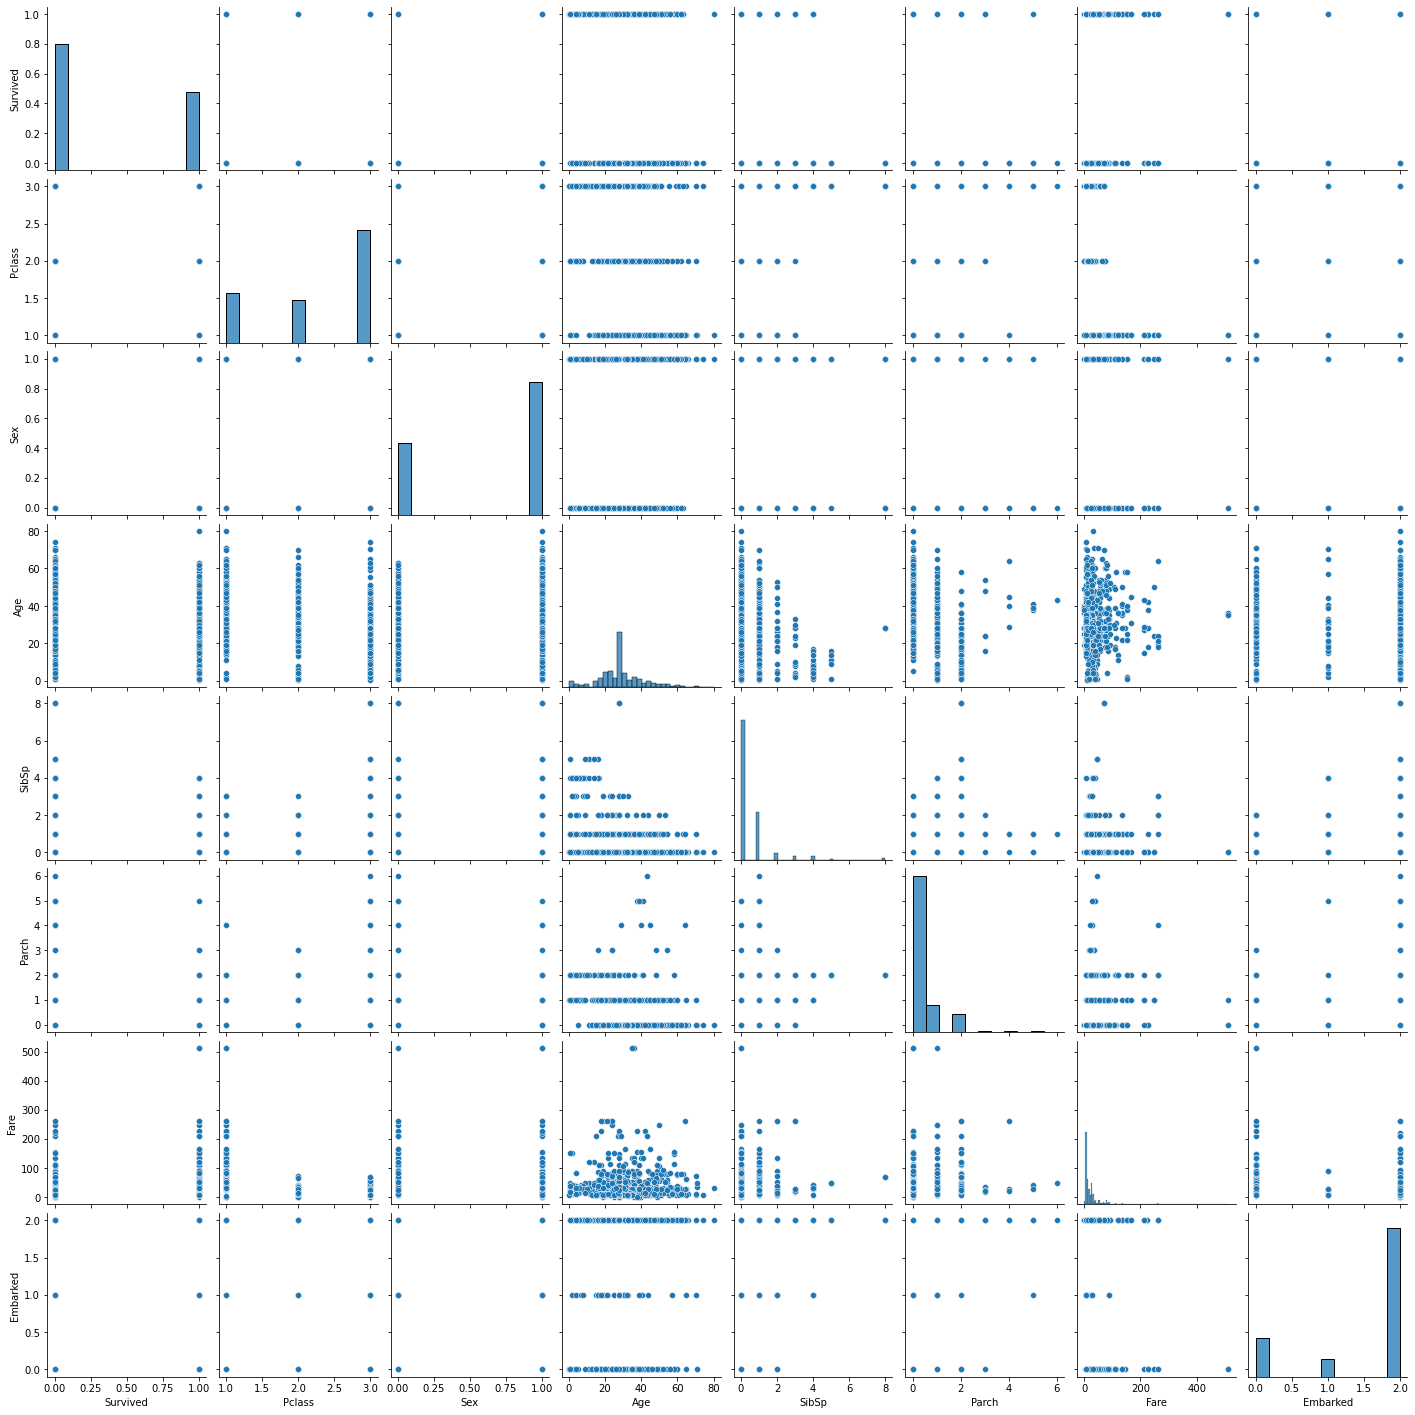

In [291]:
sns.pairplot(df)
plt.show()

### Box plot

<AxesSubplot:>

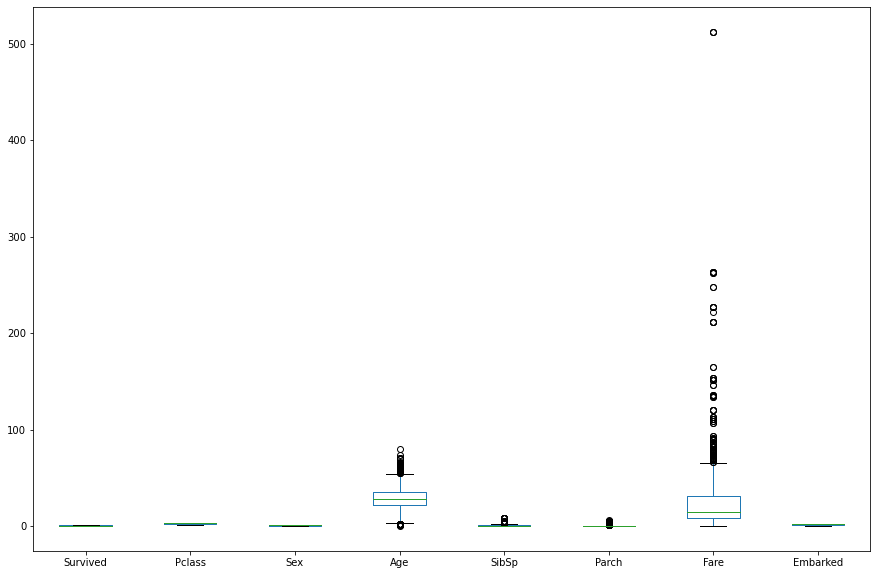

In [292]:
df.plot(kind='box',figsize=(15,10))

<function matplotlib.pyplot.show(close=None, block=None)>

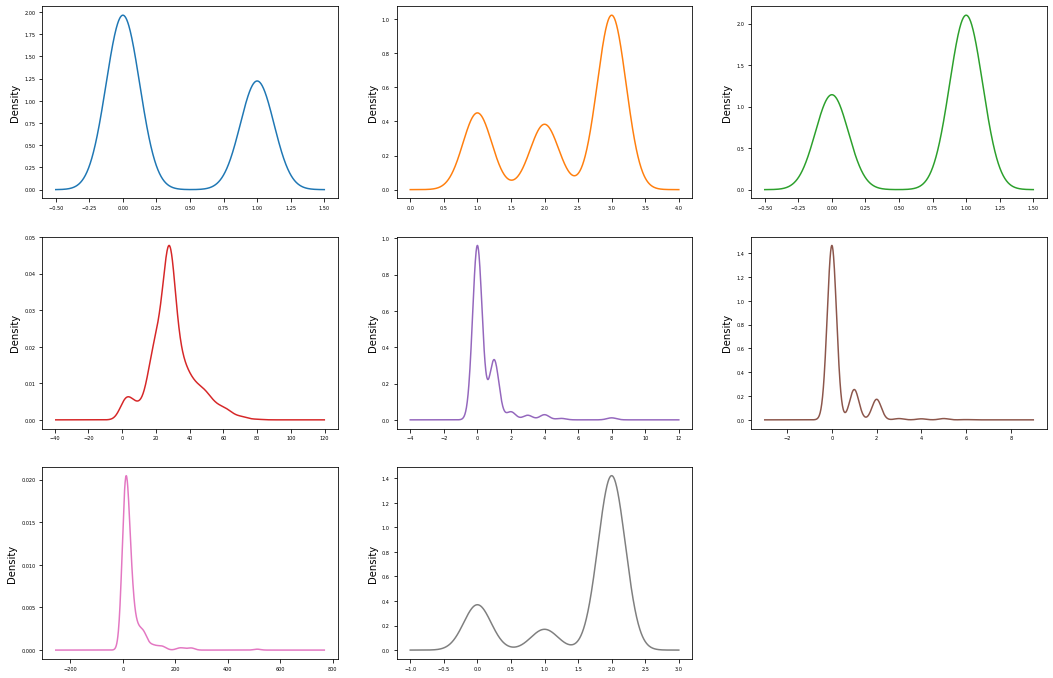

In [246]:
#checking the data distribution with all the columns
df.plot(kind='density', subplots=True, sharex=False,layout=(3,3), legend=False, fontsize=5, figsize=(18,12))
plt.show

In [247]:
#correlation matrix
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


#### Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

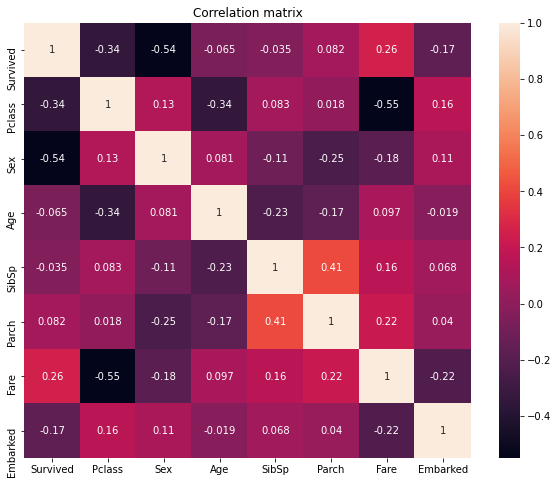

In [293]:
corr_mat=df.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True) # plotting the correlation matrix
plt.title('Correlation matrix')
plt.show

#### Z-score Value

In [294]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [295]:
df_new=df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


With the help of above functionality we are trying to get all the values that is equal or below from threshold point.

In [296]:
df.shape

(891, 8)

In [297]:
df_new.shape

(820, 8)

In [298]:
#percentage loss
percentage_loss=((891-820)/891)*100
print(percentage_loss)

7.968574635241302


### Splitting the train and test data

In [299]:
x=df_new.drop('Survived',axis=1)
y=df_new['Survived']

#### Scaling the data

In [300]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= pd.DataFrame(sc.fit_transform(x))
x # Displaying all the features after applying scaling technique to avoid bias output

,0,1,2,3,4,5,6
0,0.833995,0.722036,-0.611926,1.051956,-0.451141,-0.623707,0.583162
1,-1.586804,-1.384973,0.703210,1.051956,-0.451141,1.525109,-1.953669
2,0.833995,-1.384973,-0.283142,-0.563407,-0.451141,-0.601055,0.583162
3,-1.586804,-1.384973,0.456622,1.051956,-0.451141,0.914918,0.583162
4,0.833995,0.722036,0.456622,-0.563407,-0.451141,-0.596861,0.583162
...,...,...,...,...,...,...,...
815,-0.376405,0.722036,-0.200946,-0.563407,-0.451141,-0.430749,0.583162
816,-1.586804,-1.384973,-0.858515,-0.563407,-0.451141,0.139733,0.583162
817,0.833995,-1.384973,-0.118750,1.051956,3.088912,-0.080071,0.583162
818,-1.586804,0.722036,-0.283142,-0.563407,-0.451141,0.139733,-1.953669


In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

### Creating the train and test data for model building

In [302]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=200)

In [303]:
# Classification Model Function

def classify(model, x, y):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=200)
    
    # Training the model
    model.fit(x_train,y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion matrix 
    Confusion_matrix=(confusion_matrix(y_test,pred))
    print('\nConfusion matrix:\n', Confusion_matrix)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [304]:
# Logistic Regression

model=LogisticRegression()
classify(model, x, y)

Accuracy Score: 82.92682926829268

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       106
           1       0.73      0.83      0.77        58

    accuracy                           0.83       164
   macro avg       0.81      0.83      0.82       164
weighted avg       0.84      0.83      0.83       164


Confusion matrix:
 [[88 18]
 [10 48]]

Cross Validation Score: 79.02439024390245

Accuracy Score - Cross Validation Score is 3.902439024390233


In [305]:
# Support Vector Classifier

model=SVC(kernel='rbf', gamma='auto')
classify(model, x, y)

Accuracy Score: 84.14634146341463

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       106
           1       0.74      0.84      0.79        58

    accuracy                           0.84       164
   macro avg       0.83      0.84      0.83       164
weighted avg       0.85      0.84      0.84       164


Confusion matrix:
 [[89 17]
 [ 9 49]]

Cross Validation Score: 81.70731707317073

Accuracy Score - Cross Validation Score is 2.439024390243901


In [306]:
model=DecisionTreeClassifier(max_depth=10)
classify(model, x, y)

Accuracy Score: 79.8780487804878

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       106
           1       0.70      0.74      0.72        58

    accuracy                           0.80       164
   macro avg       0.78      0.79      0.78       164
weighted avg       0.80      0.80      0.80       164


Confusion matrix:
 [[88 18]
 [15 43]]

Cross Validation Score: 78.65853658536585

Accuracy Score - Cross Validation Score is 1.2195121951219505


In [316]:
# Random Forest Classifier

model=RandomForestClassifier()
classify(model,x, y)

Accuracy Score: 81.09756097560977

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.85       106
           1       0.70      0.83      0.76        58

    accuracy                           0.81       164
   macro avg       0.80      0.81      0.80       164
weighted avg       0.82      0.81      0.81       164


Confusion matrix:
 [[85 21]
 [10 48]]

Cross Validation Score: 79.8780487804878

Accuracy Score - Cross Validation Score is 1.2195121951219647


In [315]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=7)
classify(model, x, y)

Accuracy Score: 83.53658536585365

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       106
           1       0.74      0.83      0.78        58

    accuracy                           0.84       164
   macro avg       0.82      0.83      0.82       164
weighted avg       0.84      0.84      0.84       164


Confusion matrix:
 [[89 17]
 [10 48]]

Cross Validation Score: 79.02439024390245

Accuracy Score - Cross Validation Score is 4.512195121951208


In [309]:
model=AdaBoostClassifier(base_estimator=None,n_estimators=50, algorithm='SAMME')
classify(model, x, y)

Accuracy Score: 81.70731707317073

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       106
           1       0.71      0.83      0.76        58

    accuracy                           0.82       164
   macro avg       0.80      0.82      0.81       164
weighted avg       0.83      0.82      0.82       164


Confusion matrix:
 [[86 20]
 [10 48]]

Cross Validation Score: 78.29268292682927

Accuracy Score - Cross Validation Score is 3.414634146341456


### Hyper parameter tuning

In [317]:
# Choosing Random Forest Classifier

parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [318]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [326]:
GCV_pred=GCV.best_estimator_.predict(x_test)
RF=accuracy_score(y_test,GCV_pred)
RF

0.823170731707317

In [331]:
import numpy as np
a=np.array(y_test)
a

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [336]:
predicted=np.array(model.predict(x_test))
predicted

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [339]:
import joblib
joblib.dump(GCV.best_estimator_,'TitanicRF.pkl')

['TitanicRF.pkl']